In [1]:
import urllib
import requests
from IPython.core.display import HTML
def css_styling():
    styles = requests.get('https://raw.githubusercontent.com/saadtony/NumericalMethods/master/styles/custom.css')
    return HTML(styles.text)
css_styling()

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.animation as animation
%matplotlib inline
%config InlineBackend.figure_format='svg'
plt.rcParams['animation.html'] = 'html5'

# Finite Volume Implementation

We will be integrating the following equation on a finite-volume scheme:

$$ \frac{\partial \phi}{\partial t} = -\frac{\partial F}{\partial x} $$

where $F = u\phi$.

$$\int^{t_{n+1}}_{t_{n}} \int^{e}_{w} \frac{\partial \phi }{\partial t} dxdt\  =\  -\int^{t_{n+1}}_{t_{n}} \int^{e}_{w} \frac{\partial F}{\partial x} dxdt $$

If we define:

$$\tilde{\phi } =\frac{1}{\Delta x} \int^{e}_{w} \phi dx$$

then the equation becomes:

$$\int^{t_{n+1}}_{t_{n}} \frac{\partial \tilde{\varphi } }{\partial t} \Delta xdt=-\int^{t_{n+1}}_{t_{n}} \left( F_{e}-F_{w}\right)  dt $$

$$\tilde{\varphi }^{n+1} -\tilde{\varphi }^{n} =-\frac{\bigtriangleup t}{\bigtriangleup x} \left( \tilde{F}_{e} -\tilde{F}_{w} \right)  $$

where

$$\tilde{F} =\frac{1}{\Delta t} \int^{t_{n+1}}_{t_{n}} Fdt$$

To implement the midpoint rule as an integrator, we will use a predictor-corrector method to get the flux at $t=n+\frac{1}{2}$

In [3]:
def step(x, x0):
    x0 = 0.6
    x1 = 0.8
    result = x - x0
    result[x-x1<x1] = 1.
    result[x<x0] = 0.
    result[x>x1] = 0.
    return result

In [4]:
x = np.linspace(0, 1, 20)

In [7]:
step_x = step(x, 0.6)

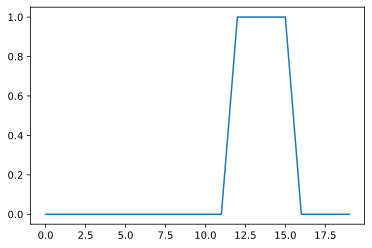

In [8]:
plt.plot(step_x)